In [1]:
import os
os.environ["SPS_HOME"] = "/Users/fpetri/packages/fsps" 

In [2]:
import numpy as np
import lbg_forecast.nz_sim as nz
import lbg_forecast.emulator as em
import lbg_forecast.hyperparams as hyp
import lbg_forecast.tools as tools
import matplotlib.pyplot as plt

2023-12-08 14:18:38.820552: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2023-12-08 14:18:38.820571: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-12-08 14:18:38.820578: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-12-08 14:18:38.820605: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-08 14:18:38.820619: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
# initalise fsps emulator
model = em.fsps_emulator()
sps_params = model._sps_params

In [4]:
# nz histogram parameters
dz = 0.1
minz = 0.0
maxz = 7.0

bins = np.arange(minz, maxz, dz)

In [5]:
bounds = hyp.define_hyperparameter_bounds(   

    zred = np.array([0, 0, 7]),
    logtage = np.array([0, -3, 1]),
    logzsol = np.array([1, -2.5, 0.5]),
    dust1 = np.array([1, 0, 2]),
    dust2 = np.array([1, 0, 2]),
    igm_factor = np.array([0, 1, 1]), 
    gas_logu = np.array([1, -4, -1]),
    logfagn = np.array([1, 0, 10]),
    imf1 = np.array([0, 1.3, 1.3]), 
    imf2 = np.array([0, 2.3, 2.3]), 
    imf3 = np.array([0, 2.3, 2.3]), 
    logtau = np.array([1, -4, 1]),
    loga = np.array([1, -3, 3]),
    logb = np.array([1, -3, 3]),
    logmass = np.array([1, 7, 13])
    
)

In [6]:
hyperparams = []
nsamples = 4
h = 0
while(h < nsamples):
    hyperparams.append(hyp.sample_hyper_parameters(bounds))
    h+=1

hyperparams = np.asanyarray(hyperparams)
#hyperparams[i] gives hyparams for realisation i

In [7]:
g = 0
nz_data = []
while(g<nsamples):
    sps_params = tools.draw_sps_parameters(100000, hyperparams[g])
    nzs = nz.simulate_nzs(sps_params, model, bins)
    nz_data.append(nzs)
    g+=1

/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)
/Users/fpetri/anacon

In [8]:
hyperparams[2]

array([[array([0., 0., 7.]), 0.0, 7.0],
       [array([ 0., -3.,  1.]), -3.0, 1.0],
       [array([ 1. , -2.5,  0.5]), -2.2235586602818564,
        0.7521947062655888],
       [array([1., 0., 2.]), 0.10639904296595892, 0.04602139479674702],
       [array([1., 0., 2.]), 0.4537973540749536, 1.0416649732070535],
       [array([0., 1., 1.]), 1.0, 1.0],
       [array([ 1., -4., -1.]), -2.0614466096320108, 2.625101529017613],
       [array([ 1.,  0., 10.]), 0.9912584313832518, 1.2072268442145677],
       [array([0. , 1.3, 1.3]), 1.3, 1.3],
       [array([0. , 2.3, 2.3]), 2.3, 2.3],
       [array([0. , 2.3, 2.3]), 2.3, 2.3],
       [array([ 1., -4.,  1.]), -0.08790339068697994, 3.5123653564566237],
       [array([ 1., -3.,  3.]), 0.13226531437206912, 1.7727547750398656],
       [array([ 1., -3.,  3.]), 1.5778831073402113, 1.0498170843678265],
       [array([ 1.,  8., 11.]), 9.645424977228231, 0.7310122656126139]],
      dtype=object)

<BarContainer object of 69 artists>

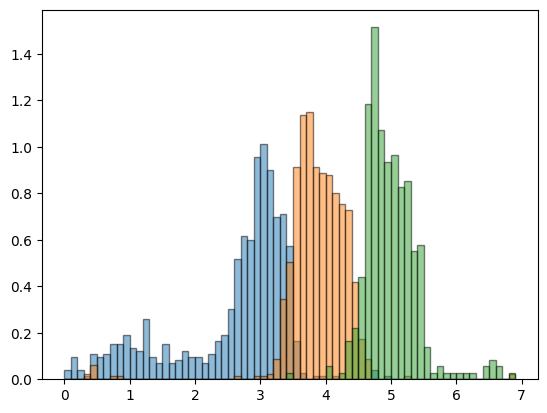

In [14]:
realisation = 3
plt.bar(bins[:-1], nz_data[realisation][0], width=np.diff(bins), edgecolor="black", align="edge", alpha=0.5, lw=1)
plt.bar(bins[:-1], nz_data[realisation][1], width=np.diff(bins), edgecolor="black", align="edge", alpha=0.5, lw=1)
plt.bar(bins[:-1], nz_data[realisation][2], width=np.diff(bins), edgecolor="black", align="edge", alpha=0.5, lw=1)

In [10]:
nz_data[realisation][0]

array([0.        , 0.0128041 , 0.        , 0.02560819, 0.        ,
       0.06402049, 0.02560819, 0.03841229, 0.10243278, 0.02560819,
       0.08962868, 0.03841229, 0.03841229, 0.10243278, 0.06402049,
       0.02560819, 0.03841229, 0.05121639, 0.05121639, 0.07682458,
       0.06402049, 0.06402049, 0.05121639, 0.07682458, 0.19206146,
       0.26888604, 0.43533931, 0.51216389, 0.78104994, 1.07554417,
       1.45966709, 0.99871959, 0.99871959, 0.79385403, 0.61459667,
       0.35851472, 0.12804097, 0.06402049, 0.02560819, 0.        ,
       0.        , 0.        , 0.0128041 , 0.        , 0.0128041 ,
       0.        , 0.0128041 , 0.        , 0.        , 0.02560819,
       0.        , 0.        , 0.02560819, 0.0128041 , 0.0128041 ,
       0.        , 0.0128041 , 0.        , 0.        , 0.02560819,
       0.        , 0.        , 0.0128041 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

uniform = np.load("/Users/fpetri/repos/LBGforecast/data/data/training_params.npy")[:1000000]
nz_uni = nz.simulate_nzs(uniform, model, bins)
plt.bar(bins[:-1], nz_uni[0], width=np.diff(bins), edgecolor="black", align="edge", alpha=0.5, lw=1)
plt.bar(bins[:-1], nz_uni[1], width=np.diff(bins), edgecolor="black", align="edge", alpha=0.5, lw=1)
plt.bar(bins[:-1], nz_uni[2], width=np.diff(bins), edgecolor="black", align="edge", alpha=0.5, lw=1)

In [11]:
#n_sims = 100
#sim_no = 82

while(sim_no <= 100):
    
    red_mu = np.random.uniform(0.1, 7.0)
    red_sigma = np.random.uniform(1.0, 5.0)
    
    age_mu = np.random.uniform(-3, np.log10(cosmo.age(red_mu).value))
    age_sigma = np.random.uniform(1, 2)
    mass_mu = np.random.uniform(7, 13)
    mass_sigma = np.random.uniform(1, 3)
    tau_mu = np.random.uniform(-1, 2)
    tau_sigma = np.random.uniform(1, 2)
    const_mu = np.random.uniform(0, 1)
    const_sigma = np.random.uniform(0.1, 1)
    met_mu = np.random.uniform(-2.5, 0.5)
    met_sigma = np.random.uniform(0.5, 3.0)
    dust_mu = np.random.uniform(0.0, 2.0)
    dust_sigma = np.random.uniform(0.1, 2.0)
    tburst_mu = np.random.uniform(-3, age_mu)
    tburst_sigma = np.random.uniform(1, 2)
    fburst_mu = np.random.uniform(0, 1)
    fburst_sigma = np.random.uniform(0.1, 1)
    imf = np.random.uniform(1.3, 3.3)
    
    prior_params = (age_mu, age_sigma, mass_mu, mass_sigma, tau_mu, tau_sigma, const_mu, const_sigma, red_mu, red_sigma, met_mu, met_sigma, dust_mu, dust_sigma, tburst_mu, tburst_sigma, fburst_mu, fburst_sigma, imf)
    nz_sim(sim_no, prior_params)
    sim_no+=1